In [2]:
import pandas as pd
import pickle
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
import re
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [13]:
MVP_frame = pd.read_pickle("data/apt_frame_final.pickle")
MVP_frame

,address,zip code,unit,rent($),rooms,beds,baths,studio,Balcony,Bike Room,...,Sublet,Sublets Allowed,Swimming Pool,Terrace,Valet Parking,Virtual Doorman,Washer / Dryer in Unit,Water View,Waterfront,Wheelchair Access
0,574 11th Street,11215,#2,6950,6.0,3.0,2.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,3900 Kings Highway,11234,#APT6M,2075,3.0,2.0,1.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,161 Engert Avenue,11222,#1L,2600,4.0,2.0,1.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1326 Ocean Avenue,11230,#2/G,2300,3.0,2.0,1.0,0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,223 9th Street,11215,#3/FLR,2395,5.0,2.0,2.0,0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3562,224 Eckford Street,11222,#3,4800,6.0,4.0,2.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3563,222 Stanhope Street,11237,#3LA,2625,6.0,4.0,1.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3564,178 Ocean Parkway,11218,#A57,1575,3.0,0.0,1.0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3565,345 Eldert Street,11237,#EE120,2720,2.0,1.0,1.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
MVP_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3372 entries, 0 to 3566
Data columns (total 69 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   address                          3372 non-null   object 
 1   zip code                         3372 non-null   int64  
 2   unit                             3372 non-null   object 
 3   rent($)                          3372 non-null   int64  
 4   rooms                            3372 non-null   float64
 5   beds                             3372 non-null   float64
 6   baths                            3372 non-null   float64
 7   studio                           3372 non-null   int64  
 8   Balcony                          3372 non-null   float64
 9   Bike Room                        3372 non-null   float64
 10  Board Approval Required          3372 non-null   float64
 11  Cats Only - No Dogs              3372 non-null   float64
 12  Cats and Dogs Allowe

In [15]:
MVP_frame.corr()

,zip code,rent($),rooms,beds,baths,studio,Balcony,Bike Room,Board Approval Required,Cats Only - No Dogs,...,Sublet,Sublets Allowed,Swimming Pool,Terrace,Valet Parking,Virtual Doorman,Washer / Dryer in Unit,Water View,Waterfront,Wheelchair Access
zip code,1.000000,-0.074177,0.091737,0.100676,0.029312,-0.095258,0.038062,-0.076285,0.003490,0.005617,...,0.002846,-0.074924,-0.265763,-0.018529,0.015300,0.029322,-0.119324,-0.090254,0.012909,-0.005610
rent($),-0.074177,1.000000,0.241840,0.262762,0.330798,-0.113476,0.079073,0.145877,0.000014,-0.012478,...,0.016736,-0.013087,0.115510,0.115914,0.011739,0.045682,0.254442,0.170135,0.033372,0.074383
rooms,0.091737,0.241840,1.000000,0.742571,0.483704,-0.419441,0.029029,-0.127959,-0.020966,-0.030785,...,-0.019520,-0.027614,-0.140284,0.063182,-0.097562,0.059944,-0.005179,-0.004838,-0.060595,-0.077406
beds,0.100676,0.262762,0.742571,1.000000,0.486593,-0.526156,0.034325,-0.132096,-0.013445,-0.035999,...,-0.018268,-0.049050,-0.156760,0.037203,-0.103779,0.070166,-0.031226,-0.022875,-0.075010,-0.095345
baths,0.029312,0.330798,0.483704,0.486593,1.000000,-0.122071,0.076298,0.046926,0.008759,-0.021207,...,-0.009473,-0.013401,-0.004219,0.102502,0.020103,0.076859,0.168170,0.039489,0.041883,0.008278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Virtual Doorman,0.029322,0.045682,0.059944,0.070166,0.076859,-0.039324,0.160429,0.198527,-0.013573,-0.024806,...,-0.011080,-0.015675,-0.052224,0.051988,-0.002693,1.000000,0.044008,0.032649,0.018535,0.072721
Washer / Dryer in Unit,-0.119324,0.254442,-0.005179,-0.031226,0.168170,0.069879,0.094331,0.187306,0.029196,-0.031114,...,-0.013898,-0.019661,0.251419,0.100479,0.196561,0.044008,1.000000,0.113431,0.167552,0.095104
Water View,-0.090254,0.170135,-0.004838,-0.022875,0.039489,0.049590,0.129571,0.169393,-0.005323,-0.009729,...,-0.004346,-0.006148,0.230292,0.152340,0.143099,0.032649,0.113431,1.000000,0.240956,0.120213
Waterfront,0.012909,0.033372,-0.060595,-0.075010,0.041883,0.091953,0.003348,0.172485,-0.003186,-0.005823,...,-0.002601,-0.003679,0.376810,-0.020657,0.386027,0.018535,0.167552,0.240956,1.000000,0.137889


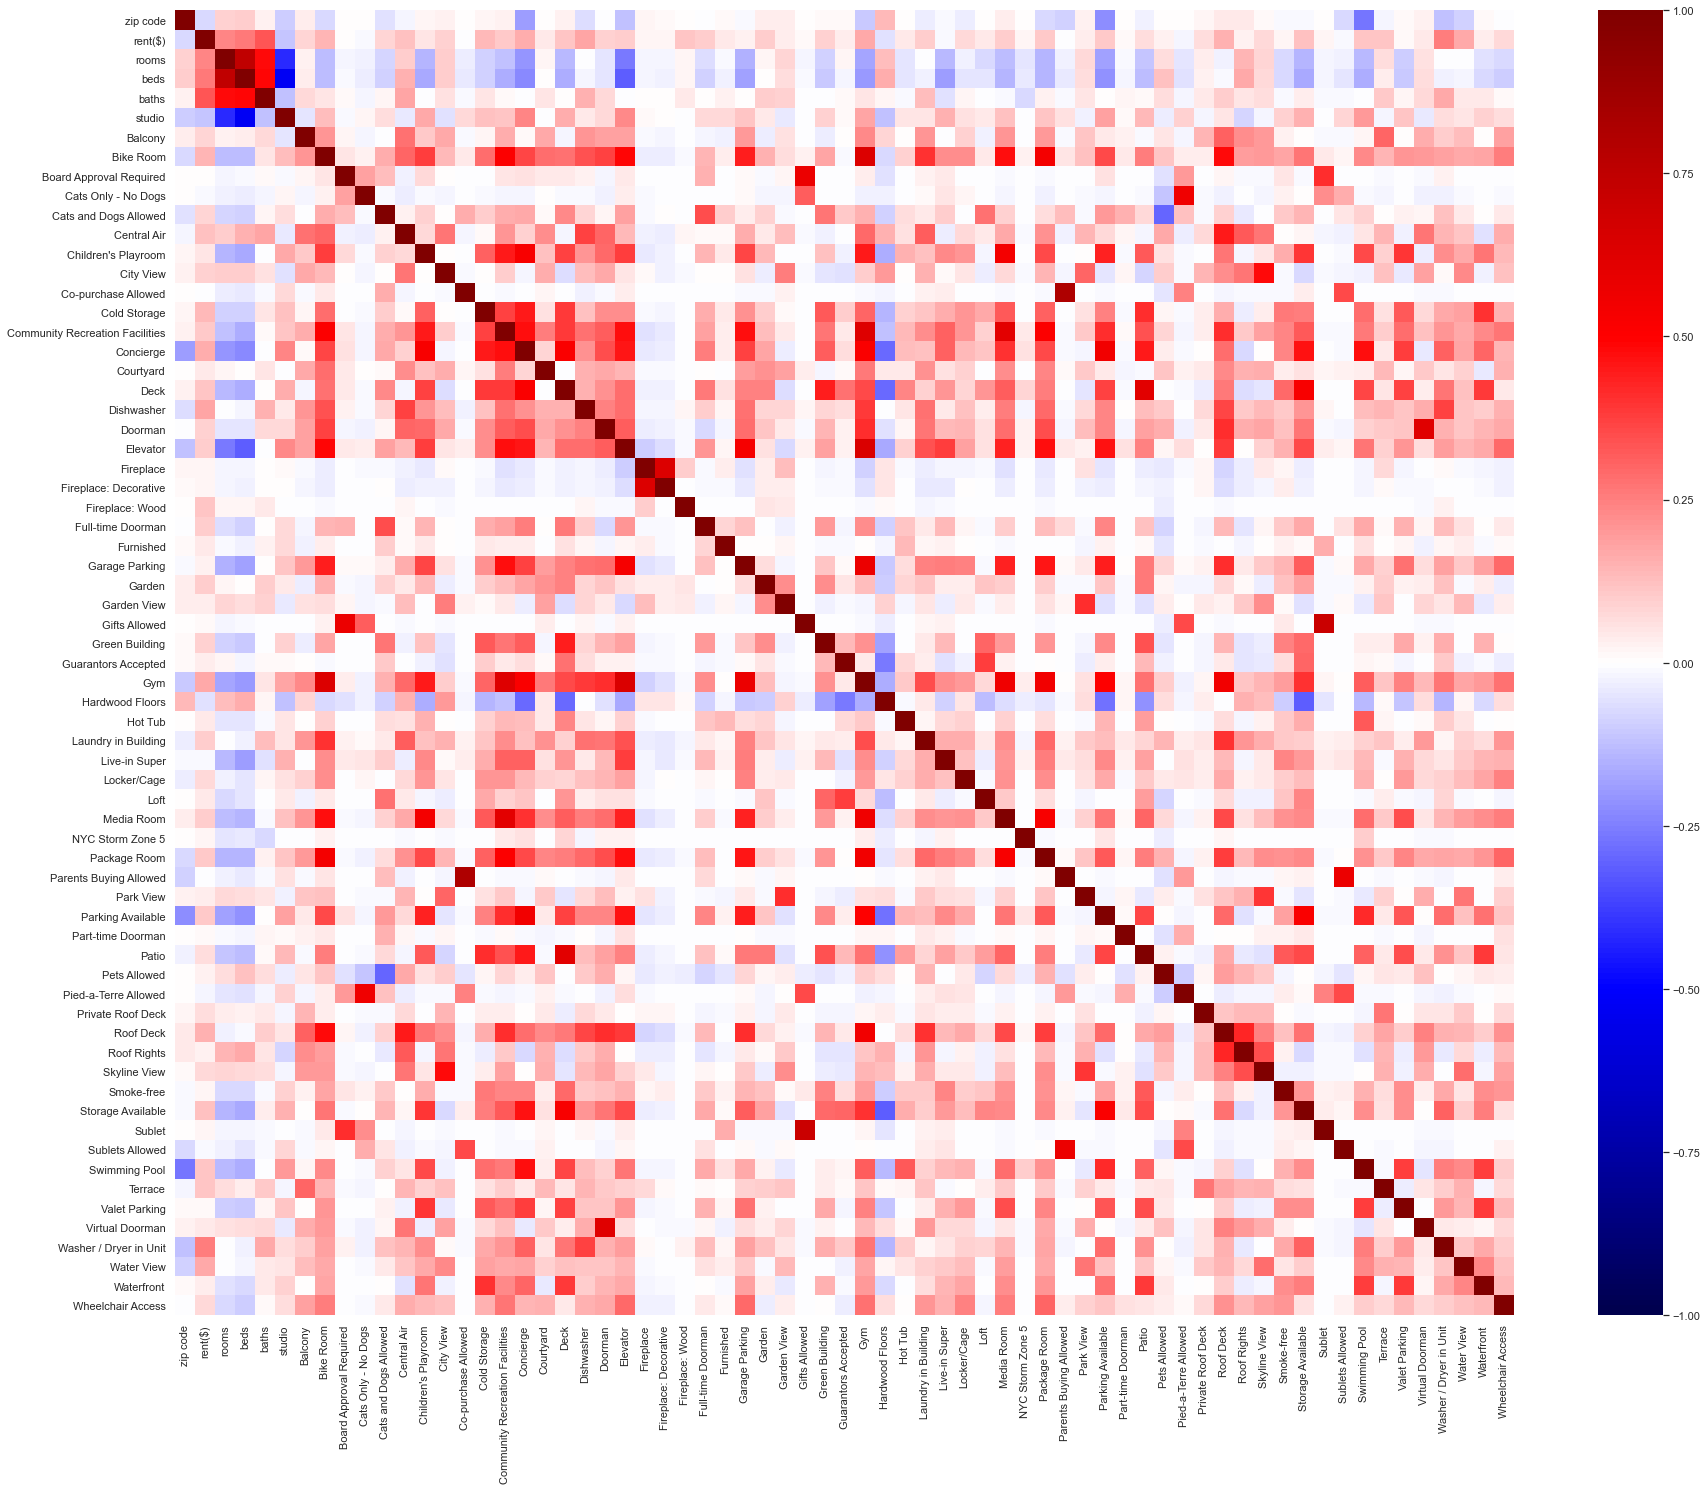

In [16]:
plt.figure(figsize = (30, 24))
sns.heatmap(MVP_frame.corr(), cmap="seismic", annot=False, vmin=-1, vmax=1);

Overall as expected; pretty strong correlation between number of rooms and rent, negatively so if there's a studio, and ZIP code is a pretty weak correlation.

One issue is the high multicolinearity of rooms and beds. May want to remove rooms for the final model.

In [ ]:
sns.pairplot(MVP_frame, height=2.0, aspect=1.5);

In [19]:
df = MVP_frame

In [27]:
features, target = ["rooms", "beds", "baths", "studio"], "rent($)"
X, y = MVP_frame[features], MVP_frame[target]
lr = LinearRegression()
lr.fit(X, y)
lr.score(X, y)

0.41411623131950903

In [29]:
train_pred = lr.predict(X)
print(train_pred)

[2434.07193867 2434.07193867 2434.07193867 3056.75130857 3056.75130857
 3056.75130857 2714.82890239 2483.17947997 2129.34817569 2568.42146994
 2287.66450622 2287.66450622 2910.34387613 2287.66450622 2287.66450622
 3056.75130857 2336.77204753 2434.07193867 2287.66450622 2434.07193867
 3056.75130857 1982.94074324 2629.58691241 2434.07193867 2287.66450622
 2483.17947997 2141.25707378 2434.07193867 2287.66450622 1836.5333108
 3056.75130857 2141.25707378 1982.94074324 3020.61685991 2483.17947997
 3056.75130857 2678.69445372  895.89833397 2892.2766518  2141.25707378
 3056.75130857 2336.77204753 2763.93644369 2287.66450622 2825.10188616
 2629.58691241 2129.34817569 2141.25707378 2336.77204753 2141.25707378
 2141.25707378 2678.69445372 3411.6468074  2287.66450622 2141.25707378
 2483.17947997 3008.55895874 2354.83927186 3319.44104796 3301.37382363
 1836.5333108  3496.88879737 2483.17947997 2287.66450622 2959.45141744
 2287.66450622 2483.17947997 2532.28702128 2825.10188616 2287.66450622
 2287.6

In [31]:
print(sqrt(mean_squared_error(y, train_pred)))

561.884223686726


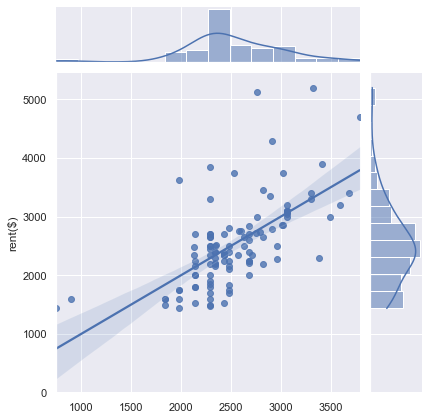

In [32]:
sns.jointplot(x=train_pred,y=y, kind='reg')

Most predictions are over the actual price, but when the actual price is higher, it's often way higher. There are clearly some factors about the price that the model isn't considering.

In [33]:
features, target = ["beds", "baths", "studio"], "rent($)"
X2, y2 = df[features], df[target]
lr2 = LinearRegression()
lr2.fit(X2, y2)
lr2.score(X2, y2)

0.3855837459474655

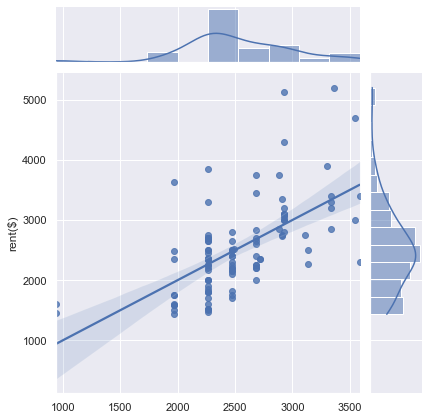

In [35]:
train_pred_2 = lr2.predict(X2)
sns.jointplot(x=train_pred_2,y=y2, kind='reg')

In [36]:
#sklearn's cross_val_score for testing different models